# uSEIR model - Fits 

In this NB we show the performance of the uSEIR and uSEIRq (quenched) chi2 and MLL fits.

We generate a pandemic and fit, using chi2 and MLL, to the pandemic model: uSEIR, uSEIRq.

We probe the fitting procedure.

We discuss some correlations between beta-Tr and T0-Tr 

Version: 2

Authors: JAH, JJG

Date: 07-07-20

In [1]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Tue Jul  7 17:48:08 2020


In [2]:
import numpy as np
import pandas as pd
import matplotlib

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.style.context('seaborn-colorblind');

In [4]:
import scipy.stats  as stats

#from scipy.integrate import odeint
#import scipy.integrate as spi
#from scipy.interpolate import interp1d

In [5]:
import c19.cfit         as cfit
import c19.useir        as us
import c19.useir_plot   as usp

npa = np.array


In [6]:
import warnings
warnings.filterwarnings("ignore")

## uSEIR

We generate the distribution of the deaths using uSEIR model

TOTO: define the parameters


### generation

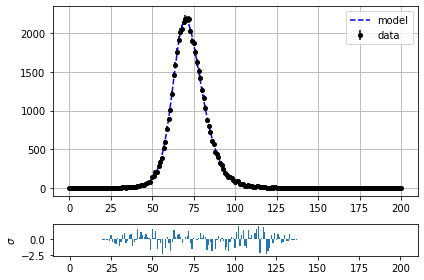

In [7]:
t0, beta, tr, ti, tm, nn, phi   = 0., 4./3., 3., 5., 9., 1e6, 0.05
pars   = (t0, beta, ti, tr, tm, nn, phi)
fmodel = us.dms_t0useir

times, xdata = us.rvs(pars, fmodel)
xs, ys       = xdata

usp.plt_data_model(xs, ys, pars, fmodel)
#plt.xlim((0., 100));

### Chi2 fit

In [8]:
pmask       = (False, True, False, True, False, False, False)
phat, fval, ffun  = us.dms_fit(xs, ys, fmodel, pars, pmask)

best estimate : [1.21145037 3.72169051] , chi2 : 107.05512419962517 , Delta Chi2 : 4.57716417942224


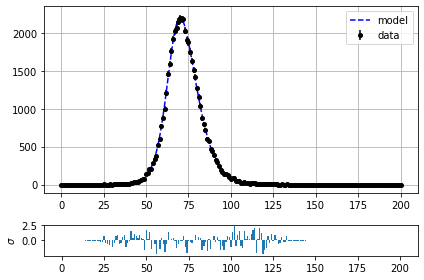

In [9]:
print('best estimate :', phat[npa(pmask)], ', chi2 :', fval, ', Delta Chi2 :', ffun(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

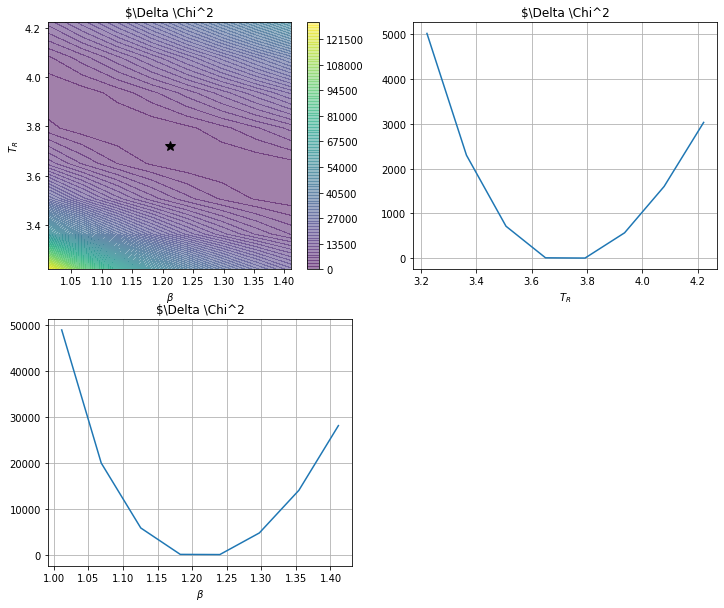

In [10]:
index0, index1 = 1, 3
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\beta$', r'$T_R$', r'$\Delta \Chi^2', levels = 100)

In [11]:
#usp.plt_ffit_scan(fchi2, pars, betas, trs, 1, 3, r'$\beta$', r'$T_R$', r'$\chi^2$', levels = 100)

### MLL Fit

In [12]:
pmask       = (False, True, False, True, False, False, False)
phat, fval, ffun  = us.dms_fit(xs, ys, fmodel, pars, pmask, ffit = 'mll')

best estimate : [1.2692101  3.34683219] , mll : 367627.6309715774 , Delta mll : 1.1083577696117572


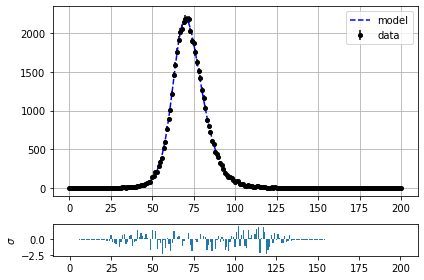

In [13]:
print('best estimate :', phat[npa(pmask)], ', mll :', fval, ', Delta mll :', ffun(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

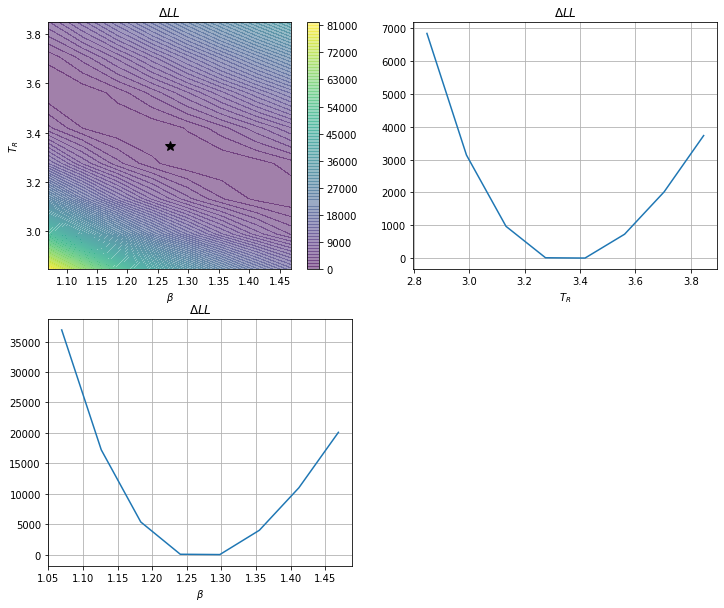

In [14]:
index0, index1 = 1, 3
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\beta$', r'$T_R$', r'$\Delta LL$', levels = 100)

### test t0 

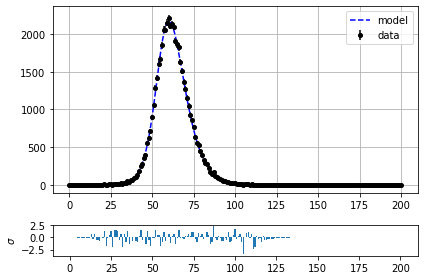

In [15]:
t0, beta, tr, ti, tm, nn, phi   = 10., 4./3., 3., 5., 9., 1e6, 0.05
pars   = (t0, beta, ti, tr, tm, nn, phi)
fmodel = us.dms_t0useir
times, xdata = us.rvs(pars, fmodel)
xs, ys       = xdata
usp.plt_data_model(xs, ys, pars, fmodel)

In [16]:
pars    = (0., beta, ti, tr, tm, nn, phi)
pmask   = (True, False, False, False, False, False, False)
phat, fval, ff = us.dms_fit(xs, ys, fmodel, pars, pmask)

best estimate : [9.964875] , fval : 106.59344083635668 , Delta f : 55800.35817250042


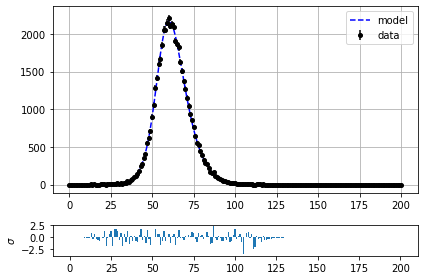

In [17]:
print('best estimate :', phat[npa(pmask)], ', fval :', fval, ', Delta f :', ff(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

#### correlation T0 - Tr

In [18]:
pars    = (t0, beta, ti, tr, tm, nn, phi)
pmask   = (True, True, False, True, False, False, False)
phat, fval, ffun = us.dms_fit(xs, ys, fmodel, pars, pmask)

best estimate : [9.7235328  1.30155503 3.19947009] , fval : 105.38574368345712 , Delta f : 1.8544479957694477


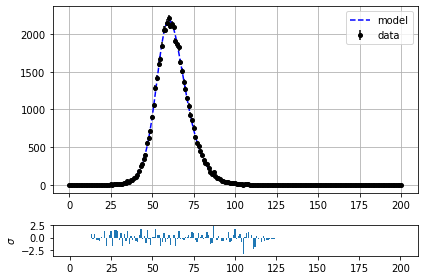

In [19]:
print('best estimate :', phat[npa(pmask)], ', fval :', fval, ', Delta f :', ff(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

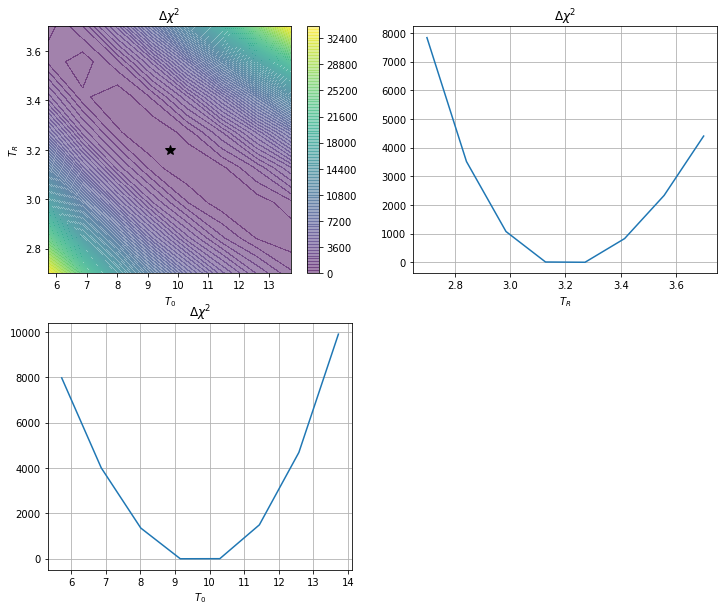

In [20]:
index0, index1 = 0, 3
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 4., bhat + 4., 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$T_0$', r'$T_R$', r'$\Delta \chi^2$', levels = 100)

## uSEIR quenched 

### generation

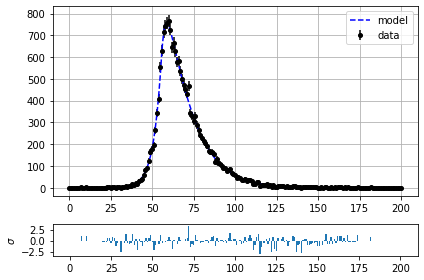

In [21]:
t0, beta, gamma, tr, ti, tm, nn, phi, s1   = 0., 4./3., 0.8/3., 3., 5., 9., 1e6, 0.05, 0.15
pars   = (t0, beta, gamma, ti, tr, tm, nn, phi, s1)
fmodel = us.dms_t0useirq

times, xdata = us.rvs(pars, fmodel)
xs, ys       = xdata

usp.plt_data_model(xs, ys, pars, fmodel)
#plt.xlim((0., 100));

### Chi2 Fit

In [22]:
pmask       = (False, True, True, False, True, False, False, False, False)
phat, fval, ffun  = us.dms_fit(xs, ys, fmodel, pars, pmask)

best estimate : [1.25912399 0.22894826 3.40659181] , fval : 149.2942905647124 , Delta f : 7.141269222422011


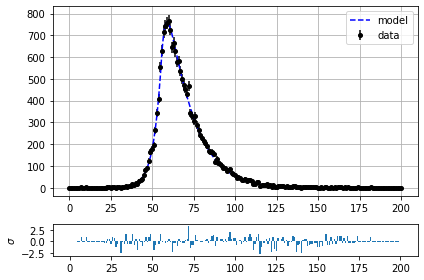

In [23]:
print('best estimate :', phat[npa(pmask)], ', fval :', fval, ', Delta f :', ffun(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

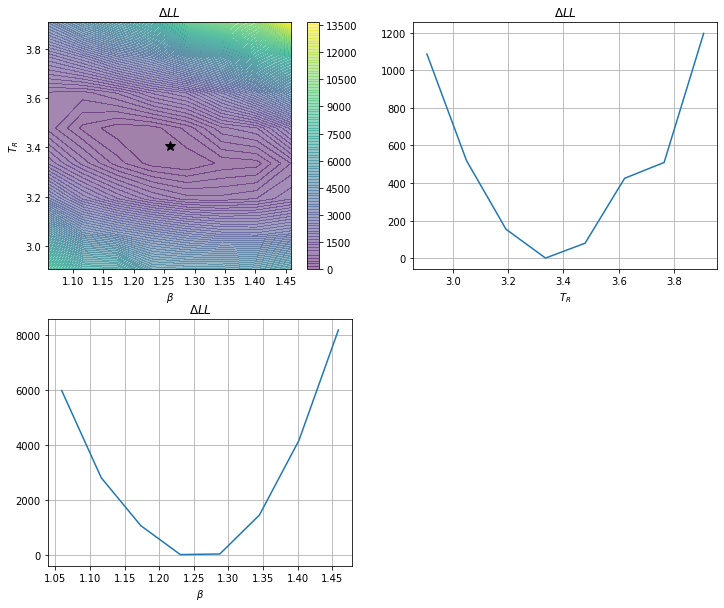

In [24]:
index0, index1 = 1, 4
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\beta$', r'$T_R$', r'$\Delta LL$', levels = 100)

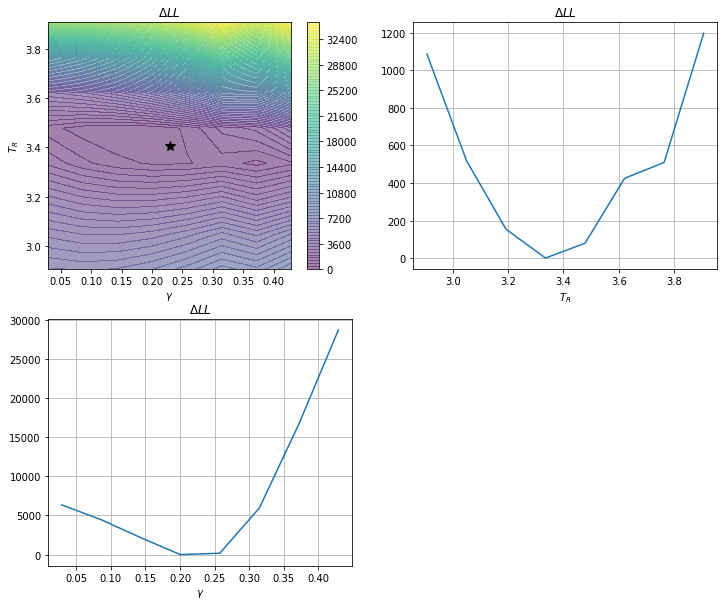

In [25]:
index0, index1 = 2, 4
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\gamma$', r'$T_R$', r'$\Delta LL$', levels = 100)

### MLL fit

In [26]:
pmask       = (False, True, True, False, True, False, False, False, False)
phat, fval, ffun  = us.dms_fit(xs, ys, fmodel, pars, pmask, ffit = 'mll')

best estimate : [1.33386455 0.27036234 3.03238793] , fval : 146989.72342535935 , Delta f : 1.2670486326678656


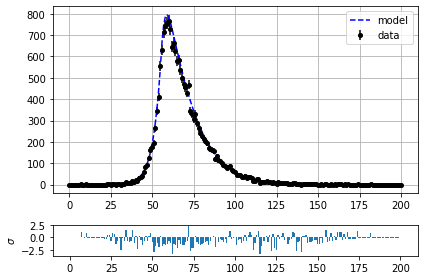

In [27]:
print('best estimate :', phat[npa(pmask)], ', fval :', fval, ', Delta f :', ffun(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

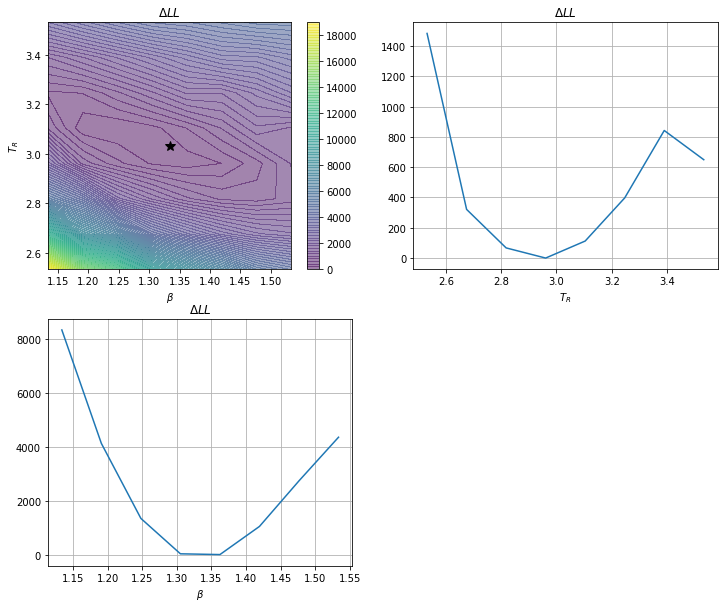

In [28]:
index0, index1 = 1, 4
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\beta$', r'$T_R$', r'$\Delta LL$', levels = 100)

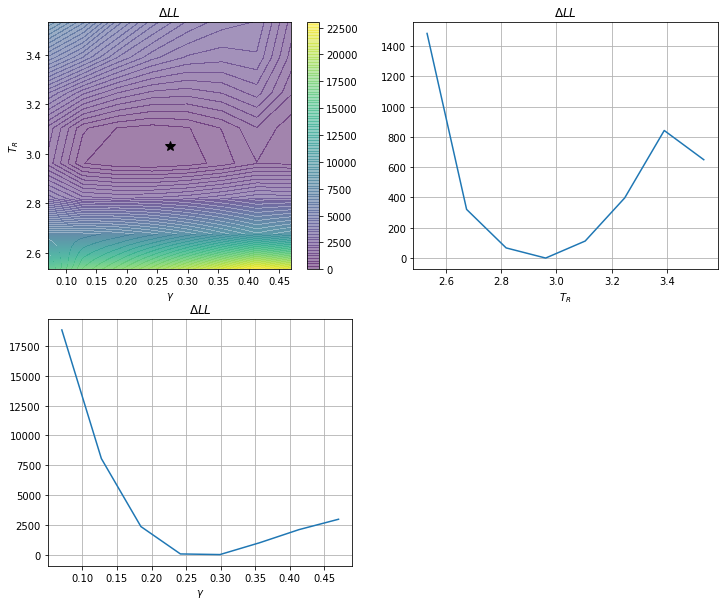

In [29]:
index0, index1 = 2, 4
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\gamma$', r'$T_R$', r'$\Delta LL$', levels = 100)

### test t0

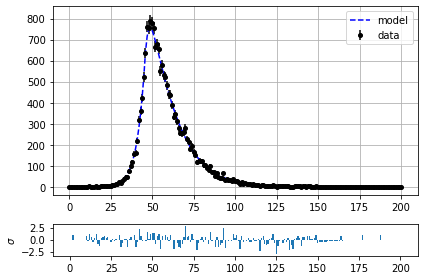

In [30]:
t0, beta, gamma, tr, ti, tm, nn, phi, s1   = 10., 4./3., 0.8/3., 3., 5., 9., 1e6, 0.05, 0.15
pars   = (t0, beta, gamma, ti, tr, tm, nn, phi, s1)
fmodel = us.dms_t0useirq

times, xdata = us.rvs(pars, fmodel)
xs, ys       = xdata

usp.plt_data_model(xs, ys, pars, fmodel)
#plt.xlim((0., 100));

In [31]:
pmask       = (True, False, False, False, False, False, False, False, False)
pars   = (0, beta, gamma, ti, tr, tm, nn, phi, s1)
phat, fval, ffun  = us.dms_fit(xs, ys, fmodel, pars, pmask)

best estimate : [10.0518125] , fval : 141.40899770632387 , Delta f : 12007.42035230783


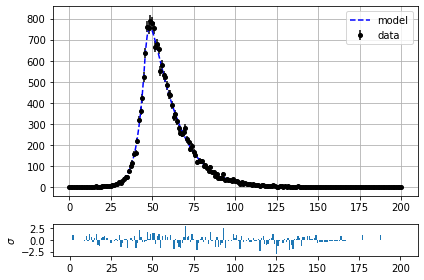

In [32]:
print('best estimate :', phat[npa(pmask)], ', fval :', fval, ', Delta f :', ffun(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

#### correlation T0 - TR

In [33]:
pmask       = (True, True, False, False, True, False, False, False, False)
pars   = (t0, beta, gamma, ti, tr, tm, nn, phi, s1)
phat, fval, ffun  = us.dms_fit(xs, ys, fmodel, pars, pmask)

best estimate : [9.88677365 1.34718234 2.95344655] , fval : 129.77251056997795 , Delta f : 12.19226075866922


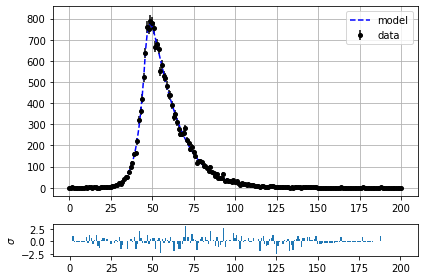

In [34]:
print('best estimate :', phat[npa(pmask)], ', fval :', fval, ', Delta f :', ffun(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

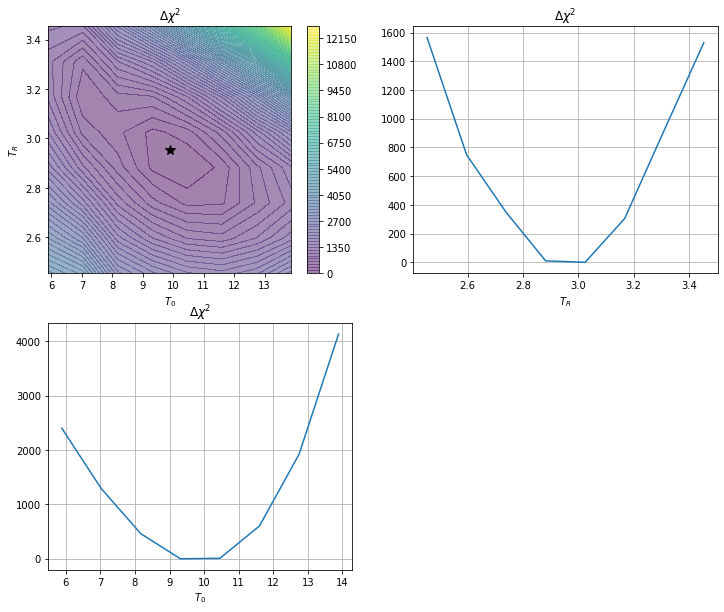

In [35]:
index0, index1 = 0, 4
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 4., bhat + 4., 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$T_0$', r'$T_R$', r'$\Delta \chi^2$', levels = 100)

## Conclusions

- There is a correlation between beta and Tr (also between R0 and Tr)

- There is a correlation betting T0 and TR. 

- Probe with an iterative method, providing 'reasonable' inputs